# Santander Bank Customer Satisfaction Prediction 


1. [Develop an understanding of the data mining project](#understanding)
2. [Obtain the data set to be used in the analysis](#dataset)
3. [Data Preparation](#prep)
   + 3.1 [Feature Selection](#featureSelection)
   - 3.2 [Dealing with missing Data](#Missing)
   + 3.3 [Handling categorical data](#categorical)
   - 3.4 [Manipulating Data](#manipulation)
4. [Exlore Data Analysys (EDA)](#eda)
   + 4.1 [Analyzing Target Variable](#AnalyzingTarget)
   - 4.2 [Separate Groups, Churn=No & Churn=Yes](#SeparateGroups)
   + 4.3 [Variables Distribution](#SeparateGroups) 
      + 4.3.2 [Findings](#Findings)
   - 4.4 [Depth-Analysis](#Depth-Analysis)
      + 4.4.2 [Insights](#IDepth-Analysis)
      + 4.5 [Correlation](#correlation)  
5. [Preproccesing](#Preproccesing)    
    + 5.1 [Reducing size Dataset](#ReducingDataSet)
    - 5.2 [Label outcome variable](#label)
    + 5.3 [Dummize Data](#dummy)
    - 5.4 [Partitioning a dataset into separate training and test sets](#partitioning) 
    + 5.5 [Bringing features onto the same scales](#features)
6. [Machine Learning Algortihms](#ML) 
    + 6.1 [Decision Tree](#DecisionTree)
        + 6.1.1 [Baseline Model](#Treebaseline)
        + 6.1.2 [Model, 'max_depth': 1, 'min_samples_leaf': 1](#Tree1)
        + 6.1.3 [Model, 'max_depth': 1, 'min_samples_leaf': 1,criterion='entropy',splitter = Random,class_weight: “balanced” ](#Tree3)
    + 6.1.2 [Evaluation & Score of DecisionTree Models](#evaluationDT)
    - 6.2 [Random Forest ](#RandomForest)
      + 6.2.1 [Baseline Model ](#RandomForestBM)
      - 6.2.2 [Model, n_estimators= 250, max_features: 7, oob_score=True](#RandomForest1)
      + 6.2.3[Model, n_estimators= 250, max_features: 7, oob_score=True, min_samples_leaf': 4, criterion: entropy,  class_weight = balanced ](#RandomForest3)
    + 6.2.2 [Evaluation & Score of RandomForest Models ](#evaluationRF)
    + 6.3[Boosting Classifier](#Boosting)
        + 6.3.1 [Baseline Model](#BaselineBoo)
        + 6.3.2 [Model, Boosting with 100 estimators](#BaselineBoo2)
        + 6.3.3 [Model, Boosting with 200 estimators and 0.5 Learning Rate](#BaselineBoo3)
    + 6.3.2 [ Evaluation & Score of Boosting Models ](#BaselineBoo5)
    + 6.4[Gradient Boost Classification](#GradientBoost)
        + 6.4.1 [Baseline Model](#GradientBoost1)
        + 6.4.2 [Model, Decreasing the Learning Rate: 0.1 & Adding Max Depth : 2 ](#GradientBoost2)
        + 6.4.3 [Model, class_weight = 'balanced',  "max_iter": 9, loss='hinge', penalty='l2'></a>](#Gradient3)
    + 6.4.2 [Evaluation & Score of Gradient Boost Classification Models](#GradientBoostEvaluation)
    + 6.5[ANN](#ANN)
        + 6.5.2 [Baseline Model](#ANN1)
        + 6.5.3 [ Model ANN - Changing hidden layers to 2 with 250 and 150 nodes & power_t=0.6](#ANN2)
        + 6.5.4 [ Model ANN - Changing hidden layers to 100 and 100 nodes & power_t=0.9](#ANN3)
    + 6.5.2 [Evaluation & Score of ANN Models](#ANN4)
    + 6.6[Stacking Models](#Stacking)
        + 6.6.2 [Stack_1 (Best ANN, Gradient, Tree & Boosting) ](#Stacking1)
7. [Conclusion and Findings](#conclusiion)
   

## 1. Develop an understanding of the project <a class="anchor" id="understanding"></a>

Customer churn also is known as the loss of clients or customers. The companies use customer churn rates as one of their key business metrics because **the cost of retaining an existing customer is far less than acquiring a new one**. Companies, as Santander, often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.Therefore, detecting clients unhappy with the company is crucial to identify possible churn clients. 

Acquiring new customers is essential, but retaining them accelerates profitable growth. So, for this project, I´ve been hired as a data scientist at Santander Bank. I have been tasked to provide information that may help in achieving two priorities. They are trying to 1) understanding unhappy customers ("Why are they unhappy? Who are they ?"), and 2)predict the probability of a dissatisfied customer. I'm going to focus on the first task because it is very related to the bussines cases scope about help in the decision making of marketing departments. 

## 2. Obtain the data set to be used in the analysis <a class="anchor" id="understanding"></a>

In [1]:
#import packages.
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import time
from operator import itemgetter
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pwd

'C:\\Users\\pablo\\Desktop\\CACU bank'

In [5]:
filename = "C:\\Users\\pablo\\Desktop\\CACU bank\\train.csv"

In [6]:
#Import Using Pandas
data=pd.read_csv(filename,  encoding = 'unicode_escape')
data.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


### Meeting the Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


The dataset does have 371 columns; it is a problem because I don't have a full dictionary where I can look up the meaning of each variable. So, I'm going to apply differents several feature selection methods for reducing the dimension of the dataset. I believe that it is going to help me in my analysis. 

## 3. Data Preparation <a class="anchor" id="prep"></a>

### 3.1 Feature Selection <a class="anchor" id="featureSelection"></a>

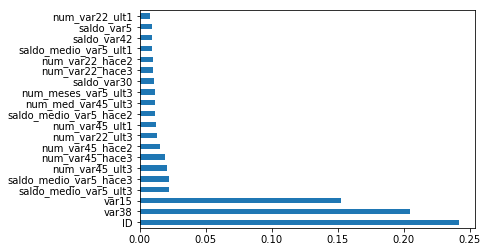

In [10]:
X = data.iloc[:,0:370]  #independent columns
y = data['TARGET']  #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [11]:
print(feat_importances.nlargest(20))

ID                        0.241604
var38                     0.204793
var15                     0.152550
saldo_medio_var5_ult3     0.022478
saldo_medio_var5_hace3    0.022298
num_var45_ult3            0.020843
num_var45_hace3           0.019045
num_var45_hace2           0.015308
num_var22_ult3            0.012896
num_var45_ult1            0.012094
saldo_medio_var5_hace2    0.011705
num_med_var45_ult3        0.011380
num_meses_var5_ult3       0.011349
saldo_var30               0.010387
num_var22_hace3           0.010318
num_var22_hace2           0.009746
saldo_medio_var5_ult1     0.009479
saldo_var42               0.009424
saldo_var5                0.009123
num_var22_ult1            0.007860
dtype: float64


In [12]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# First select features based on chi2 and f_classif
p = 3

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

Chi2 selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3'].
F_classif selected 12 features ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var4', 'num_var5', 'num_var8_0', 'num_var30', 'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3'].
Chi2 & F_classif selected 10 features
['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30', 'num_var42', 'var36', 'num_meses_var5_ult3']


So, I've applied three different Feature Selection methods to my original dataset: ExtraTreesClassifier,f_classif,chi2. The last two found 12 the number of most influence features regarding my target variable. However, I will combine both analyses to make sure that these variables can explain more than 80 % of my target variable prediction.

Creation of the new dataset: 

In [9]:
Data = data[['TARGET','ID', 'var38', 'var15','saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'num_var45_ult3', 'num_var45_hace3' , 'num_var45_hace2','num_var22_ult3','num_med_var45_ult3', 'num_var45_ult1' , 'saldo_medio_var5_hace2' , 'num_var22_hace3' , 'var36', 'saldo_var42', 'num_var22_hace2', 'saldo_var30', 'saldo_medio_var5_ult1', 'num_meses_var5_ult3','saldo_var5', 'num_var22_ult1','num_meses_var39_vig_ult3', 'ind_var30', 'num_med_var22_ult3', 'num_var4','num_var5', 'num_var8_0', 'num_var30','ind_var5','ind_var8_0',]]               

In [10]:
Data.head(3)

,TARGET,ID,var38,var15,saldo_medio_var5_ult3,saldo_medio_var5_hace3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,...,num_var22_ult1,num_meses_var39_vig_ult3,ind_var30,num_med_var22_ult3,num_var4,num_var5,num_var8_0,num_var30,ind_var5,ind_var8_0
0,0,1,39205.17,23,0.00,0.00,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,0,3,49278.03,34,0.00,88.89,0,0,0,0,...,0,2,1,0,1,0,0,3,0,0
2,0,4,67333.77,23,2.07,0.18,0,0,0,0,...,0,1,1,0,1,3,0,3,1,0


### 3.2 Dealing with missing Data <a class="anchor" id="Missing"></a>

In [11]:
print(Data.isnull().sum())

TARGET                      0
ID                          0
var38                       0
var15                       0
saldo_medio_var5_ult3       0
saldo_medio_var5_hace3      0
num_var45_ult3              0
num_var45_hace3             0
num_var45_hace2             0
num_var22_ult3              0
num_med_var45_ult3          0
num_var45_ult1              0
saldo_medio_var5_hace2      0
num_var22_hace3             0
var36                       0
saldo_var42                 0
num_var22_hace2             0
saldo_var30                 0
saldo_medio_var5_ult1       0
num_meses_var5_ult3         0
saldo_var5                  0
num_var22_ult1              0
num_meses_var39_vig_ult3    0
ind_var30                   0
num_med_var22_ult3          0
num_var4                    0
num_var5                    0
num_var8_0                  0
num_var30                   0
ind_var5                    0
ind_var8_0                  0
dtype: int64


Succesfully handled missing values

### 3.3 Handling categorical Data <a class="anchor" id="categorical"></a>

In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 31 columns):
TARGET                      76020 non-null int64
ID                          76020 non-null int64
var38                       76020 non-null float64
var15                       76020 non-null int64
saldo_medio_var5_ult3       76020 non-null float64
saldo_medio_var5_hace3      76020 non-null float64
num_var45_ult3              76020 non-null int64
num_var45_hace3             76020 non-null int64
num_var45_hace2             76020 non-null int64
num_var22_ult3              76020 non-null int64
num_med_var45_ult3          76020 non-null int64
num_var45_ult1              76020 non-null int64
saldo_medio_var5_hace2      76020 non-null float64
num_var22_hace3             76020 non-null int64
var36                       76020 non-null int64
saldo_var42                 76020 non-null float64
num_var22_hace2             76020 non-null int64
saldo_var30                 76020 non-null float

There is no categorical data, but I will need to handle some variables because they have too many values. I want to range the data by age, salary and so on. I don't want an exact wage or year. I want to visualize the differences between a nonhappy and happy customer. Therefore, I would have a first approach about the general features of each group. 

### 3.4 Manipulating Data <a class="anchor" id="manipulation"></a>

#### VAR 38, mortage value with the bank

In [13]:
#Replacing spaces with null values in total charges column
Data['var38'] = Data["var38"].replace(" ",np.nan)

In [14]:
pd.options.display.float_format = "{:.2f}".format

In [15]:
Data.var38.describe()

count      76020.00
mean      117235.81
std       182664.60
min         5163.75
25%        67870.61
50%       106409.16
75%       118756.25
max     22034738.76
Name: var38, dtype: float64

In [16]:
#Tenure to categorical column
def tenure_lab(Data) :
    
    if Data["var38"] <= 67870.61:
        return "LowMortgage"
    elif (Data["var38"] > 67870.61) & (Data["var38"] <= 106409.16 ):
        return "MediumMortgage1"
    elif (Data["var38"] > 106409.16) & (Data["var38"] <=  118756.25) :
        return "MediumMortgage2"
    elif Data["var38"] > 118756.25 :
        return "HighMorgtage"
Data["Mortgage_group"] = Data.apply(lambda Data:tenure_lab(Data),
                                      axis = 1)

#### VAR 15, age customer

In [17]:
Data.var15.describe()

count   76020.00
mean       33.21
std        12.96
min         5.00
25%        23.00
50%        28.00
75%        40.00
max       105.00
Name: var15, dtype: float64

In [18]:
#Tenure to categorical column
def tenure_lab(Data) :
    
    if Data["var15"] <= 25:
        return "young adult"
    elif (Data["var15"] > 25) & (Data["var15"] <=  45) :
        return "Adults"
    elif (Data["var15"] > 45) & (Data["var15"] <=  65) :
        return "Seniors"
    elif Data["var15"] >65 :
        return "Old"
Data["Age_group"] = Data.apply(lambda Data:tenure_lab(Data),
                                      axis = 1)

In [19]:
Data.head()

,TARGET,ID,var38,var15,saldo_medio_var5_ult3,saldo_medio_var5_hace3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,...,ind_var30,num_med_var22_ult3,num_var4,num_var5,num_var8_0,num_var30,ind_var5,ind_var8_0,Mortgage_group,Age_group
0,0,1,39205.17,23,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,LowMortgage,young adult
1,0,3,49278.03,34,0.00,88.89,0,0,0,0,...,1,0,1,0,0,3,0,0,LowMortgage,Adults
2,0,4,67333.77,23,2.07,0.18,0,0,0,0,...,1,0,1,3,0,3,1,0,LowMortgage,young adult
3,0,8,64007.97,37,138.84,0.00,48,3,27,3,...,1,0,3,3,0,3,1,0,LowMortgage,Adults
4,0,10,117310.98,39,13501.47,0.30,0,0,0,9,...,1,3,1,0,0,3,0,0,MediumMortgage2,Adults


#### saldo_medio_var5_ult3, saldolast3months

In [20]:
Data.saldo_medio_var5_ult3.describe()

count    76020.00
mean      1048.86
std       8189.95
min       -476.07
25%          0.00
50%          2.73
75%         83.79
max     544365.57
Name: saldo_medio_var5_ult3, dtype: float64

In [21]:
#Tenure to categorical column
def tenure_lab(Data) :
    
    if Data["saldo_medio_var5_ult3"] <= 0:
        return "Negative"
    elif (Data["saldo_medio_var5_ult3"] > 0) & (Data["saldo_medio_var5_ult3"] <= 100):
        return "low"
    elif (Data["saldo_medio_var5_ult3"] > 100) & (Data["saldo_medio_var5_ult3"] <=  3000) :
        return "Medium"
    elif (Data["saldo_medio_var5_ult3"] > 3000) & (Data["saldo_medio_var5_ult3"] <=  15000) :
        return "high"
    elif Data["saldo_medio_var5_ult3"] >15000:
        return "Superb"
Data["Saldo_last3months"] = Data.apply(lambda Data:tenure_lab(Data),
                                      axis = 1)

In [22]:
Data.head()

,TARGET,ID,var38,var15,saldo_medio_var5_ult3,saldo_medio_var5_hace3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,...,num_med_var22_ult3,num_var4,num_var5,num_var8_0,num_var30,ind_var5,ind_var8_0,Mortgage_group,Age_group,Saldo_last3months
0,0,1,39205.17,23,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,LowMortgage,young adult,Negative
1,0,3,49278.03,34,0.00,88.89,0,0,0,0,...,0,1,0,0,3,0,0,LowMortgage,Adults,Negative
2,0,4,67333.77,23,2.07,0.18,0,0,0,0,...,0,1,3,0,3,1,0,LowMortgage,young adult,low
3,0,8,64007.97,37,138.84,0.00,48,3,27,3,...,0,3,3,0,3,1,0,LowMortgage,Adults,Medium
4,0,10,117310.98,39,13501.47,0.30,0,0,0,9,...,3,1,0,0,3,0,0,MediumMortgage2,Adults,high


#### saldo_medio_var5_hace3, saldobefore3months

In [23]:
Data.saldo_medio_var5_hace3.describe()

count     76020.00
mean        891.37
std        9888.60
min          -8.04
25%           0.00
50%           0.99
75%          12.22
max     1542339.36
Name: saldo_medio_var5_hace3, dtype: float64

In [24]:
#Tenure to categorical column

def tenure_lab(Data) :
    
    if Data["saldo_medio_var5_hace3"] <= 0:
        return "Negative"
    elif (Data["saldo_medio_var5_hace3"] > 0) & (Data["saldo_medio_var5_hace3"] <= 100):
        return "low"
    elif (Data["saldo_medio_var5_hace3"] > 100) & (Data["saldo_medio_var5_hace3"] <= 3000):
        return "Medium"
    elif (Data["saldo_medio_var5_hace3"] > 3000) & (Data["saldo_medio_var5_hace3"] <=  15000):
        return "high"
    elif Data["saldo_medio_var5_hace3"] >15000:
        return "Superb"
Data["saldo_before3months"] = Data.apply(lambda Data:tenure_lab(Data),
                                      axis = 1)

In [25]:
Data.head()

,TARGET,ID,var38,var15,saldo_medio_var5_ult3,saldo_medio_var5_hace3,num_var45_ult3,num_var45_hace3,num_var45_hace2,num_var22_ult3,...,num_var4,num_var5,num_var8_0,num_var30,ind_var5,ind_var8_0,Mortgage_group,Age_group,Saldo_last3months,saldo_before3months
0,0,1,39205.17,23,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,LowMortgage,young adult,Negative,Negative
1,0,3,49278.03,34,0.00,88.89,0,0,0,0,...,1,0,0,3,0,0,LowMortgage,Adults,Negative,low
2,0,4,67333.77,23,2.07,0.18,0,0,0,0,...,1,3,0,3,1,0,LowMortgage,young adult,low,low
3,0,8,64007.97,37,138.84,0.00,48,3,27,3,...,3,3,0,3,1,0,LowMortgage,Adults,Medium,Negative
4,0,10,117310.98,39,13501.47,0.30,0,0,0,9,...,1,0,0,3,0,0,MediumMortgage2,Adults,high,low


## 4. Exploratory Data Analysis (EDA) <a class="anchor" id="EDA"></a>

### 4.1 Analyzing Target Variable <a class="anchor" id="#AnalyzingTarget"></a>

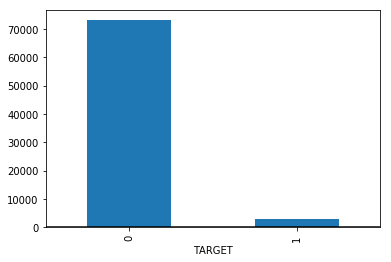

In [26]:
targetName = 'TARGET'
groupby = Data.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

In [27]:
print(targetEDA)

TARGET
0    73012
1     3008
Name: TARGET, dtype: int64


In [28]:
total = 73012 + 3008
Happy =  3008
Unhappy = 73012
print("YES = ",'{0:.2f}%'.format((Happy / total * 100)))
print("NO = ",'{0:.2f}%'.format((Unhappy / total * 100)))

YES =  3.96%
NO =  96.04%


So, here we can see that our data is oriented clearly to the Happy customers. It means that if we want to detect if a customer will be unhappy with the company (1) we need to improve this initial 3.96 % percent. Clear Imbalance in my target variable. 

### 4.2 Separate Groups <a class="anchor" id="#SeparateGroups"></a>

In [29]:
Data1 = Data[['TARGET','Mortgage_group','Age_group','Saldo_last3months','saldo_before3months']]

In [30]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 5 columns):
TARGET                 76020 non-null int64
Mortgage_group         76020 non-null object
Age_group              76020 non-null object
Saldo_last3months      76020 non-null object
saldo_before3months    76020 non-null object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [31]:
#Churn=No & Churn=Yes
Happy = Data1[Data1["TARGET"] == 0]
No_Happy = Data1[Data1["TARGET"] == 1]

In [32]:

target_col = ["TARGET"]
cat_cols   = Data1.nunique()[Data1.nunique() < 8].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]

I've separated my data into two different datasets so that I can plot more visually the difference between non-happy and happy costumers. It would be beneficial for getting my first insights. 

### 4.3 Variables Distribution <a class="anchor" id="#VariablesDistribution"></a>

In [33]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [34]:
Happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73012 entries, 0 to 76019
Data columns (total 5 columns):
TARGET                 73012 non-null int64
Mortgage_group         73012 non-null object
Age_group              73012 non-null object
Saldo_last3months      73012 non-null object
saldo_before3months    73012 non-null object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


In [35]:
#function for pie plot for customer churn types

def plot_pie(column) :
    
    trace1 = go.Pie(values  = Happy[column].value_counts().values.tolist(),
                    labels  = Happy[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Happy Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = No_Happy[column].value_counts().values.tolist(),
                    labels  = No_Happy[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "No Happy customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Happy customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Happy customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
    #for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)


### 4.3.2 Findings <a class="anchor" id="#Findings"></a>

1. Non happy customers are most likely to have a low mortage and medium mortage. 
2. This is important, 88% porcent of the non happy customers group are Adults or Seniors. It could be very important for my analysis, because you can see how the happy costumer group is predominated by young adult. Threfore, I obserb that the young people is more likely to be happy than unhppay. But, what about the adult and senior ? Let's study further this insight. 
3. I was expecting that unhappy value would have a low balance in their account. However, I didn't expect that 65 percent of the non-happy costumers would be negative. Very interesting. 

### 4.4 Depth-Analysis <a class="anchor" id="#Depth-Analysis"></a>

In [36]:
avg_tgc = Data.groupby(["Age_group","TARGET"])[["saldo_medio_var5_ult3","var38","saldo_medio_var5_hace3"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = avg_tgc[avg_tgc["TARGET"] == aggregate]["Age_group"],
                    y = avg_tgc[avg_tgc["TARGET"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Target"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean Average Balance by Age groups
trace1  = mean_charges("saldo_medio_var5_ult3",0)
trace2  = mean_charges("saldo_medio_var5_ult3",1)
layout1 = layout_plot("Average Balance by Age groups",
                      "Age group","Actual Balance")
data1   = [trace1,trace2]
fig1    = go.Figure(data=data1,layout=layout1)

#plot2 - mean Average Mortage by Age groups
trace3  = mean_charges("var38",0)
trace4  = mean_charges("var38",1)
layout2 = layout_plot("Average Mortgage by Age groups",
                      "Age groups","Mortage value")
data2   = [trace3,trace4]
fig2    = go.Figure(data=data2,layout=layout2)

#plot3 - mean Average Balance months ago by Age groups
trace5  = mean_charges("saldo_medio_var5_hace3",0)
trace6  = mean_charges("saldo_medio_var5_hace3",1)
layout2 = layout_plot("Average Balance by Age groups 3 months ago",
                      "Age groups","Balance 3 months ago")
data3   = [trace5,trace6]
fig3    = go.Figure(data=data3,layout=layout2)



### Important information : On the Plot below the label 1 represents Happy customers and label 0 Non-Happy customer

In [37]:
py.iplot(fig2)
py.iplot(fig1)
py.iplot(fig3)

In [38]:
avg_tgc = Data.groupby(["Mortgage_group","TARGET"])[["saldo_medio_var5_ult3","var15","saldo_medio_var5_hace3"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = avg_tgc[avg_tgc["TARGET"] == aggregate]["Mortgage_group"],
                    y = avg_tgc[avg_tgc["TARGET"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Target"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean Average Balance by Age groups
trace1  = mean_charges("saldo_medio_var5_ult3",0)
trace2  = mean_charges("saldo_medio_var5_ult3",1)
layout1 = layout_plot("Average Balance by Mortgage groups",
                      "Mortgage group","Actual Balance")
data1   = [trace1,trace2]
fig4    = go.Figure(data=data1,layout=layout1)

#plot2 - mean Average Mortage by Age groups
trace3  = mean_charges("var15",0)
trace4  = mean_charges("var15",1)
layout2 = layout_plot("Average Age by Client Value",
                      "Mortgage groups","Age")
data2   = [trace3,trace4]
fig5    = go.Figure(data=data2,layout=layout2)

#plot3 - mean Average Balance months ago by Age groups
trace5  = mean_charges("saldo_medio_var5_hace3",0)
trace6  = mean_charges("saldo_medio_var5_hace3",1)
layout2 = layout_plot("Average Balance by Age groups 3 months ago",
                      "Mortgage groups","Balance 3 months ago")
data3   = [trace5,trace6]
fig6    = go.Figure(data=data3,layout=layout2)



In [39]:

py.iplot(fig5)
py.iplot(fig4)
py.iplot(fig6)

### 4.4.2 Insights <a class="anchor" id="#IDepth-Analysis"></a>

Grouping the variables into categorical and associate them with the mean values of the numeric values gave me a lot of excellent insights: 

1. In every age group, happy people average more mortgage. I can interpret this data in two different ways: happy customer asks for higher loans to the bank because they TRUST in the bank, or when the customer is getting older, and the mortgage is lower the conditions are worst. So, the clients start to feel unhappy with the bank.
2. In every mortgage group, the age of Unhaapy clients averages seven years older. 
3. Big gap between unhappy and happy clients regarding the balance variable. Happy clients deposit more money in the bank, and they keep it. On the other hand, an unhappy client has a very low balance or even negative. It depends on the age group, but the gap is vast, it is between 600-1000 dollar average. 

### 4.5 Correlation <a class="anchor" id="#correlation"></a>

In [40]:
Data = data[['TARGET','ID', 'var38', 'var15','saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'num_var45_ult3', 'num_var45_hace3' , 'num_var45_hace2','num_var22_ult3','num_med_var45_ult3', 'num_var45_ult1' , 'saldo_medio_var5_hace2' , 'num_var22_hace3' , 'var36', 'saldo_var42', 'num_var22_hace2', 'saldo_var30', 'saldo_medio_var5_ult1', 'num_meses_var5_ult3','saldo_var5', 'num_var22_ult1','num_meses_var39_vig_ult3', 'ind_var30', 'num_med_var22_ult3', 'num_var4','num_var5', 'num_var8_0', 'num_var30','ind_var5','ind_var8_0',]]

In [41]:
#correlation
correlation = Data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## 5. Preproccesing <a class="anchor" id="#Preproccesing"></a>

### 5.1 Reducing size Dataset <a class="anchor" id="#ReducingDataSet"></a>

In order to visualize the dataset, the feature selection worked good because I could identify important features. However, I need to use more colums to train my data. Let's start to preprocces it: 

In [42]:
%pwd

'C:\\Users\\pablo\\Desktop\\CACU bank'

In [86]:
filename = "C:\\Users\\pablo\\Desktop\\Bank_prediction\\train.csv"

In [87]:
#Import Using Pandas
data=pd.read_csv(filename,  encoding = 'unicode_escape')


#### Remove constant features 

In [88]:
def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants

constant_features_train = set(identify_constant_features(data))

print('There were {} constant features in TRAIN dataset.'.format(
        len(constant_features_train)))

There were 34 constant features in TRAIN dataset.


In [5]:
data.drop(constant_features_train, inplace=True, axis=1)


#### Identify and remove equal variables

In [6]:
from itertools import combinations
from numpy import array,array_equal
def identify_equal_features(dataframe):
    features_to_compare = list(combinations(dataframe.columns.tolist(),2))
    equal_features = []
    for compare in features_to_compare:
        is_equal = array_equal(dataframe[compare[0]],dataframe[compare[1]])
        if is_equal:
            equal_features.append(list(compare))
    return equal_features

equal_features_train = identify_equal_features(data)

print('There were {} pairs of equal features in TRAIN dataset.'.format(len(equal_features_train)))

There were 29 pairs of equal features in TRAIN dataset.


In [7]:
features_to_drop = array(equal_features_train)[:,1] 
data.drop(features_to_drop, axis=1, inplace=True)

So, I've removed equal pairs of variables and constants. Because they add complexity to my model and not improve the predictivity. 

### 5.2 Label outcome variable  <a class="anchor" id="#label"></a>

In [89]:
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
data['TARGET'] = le_dep.fit_transform(data['TARGET'])

In [90]:
data.head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39205.17,0
1,3,2,34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49278.03,0


In [91]:
# designate target variable name
targetName = 'TARGET'
targetSeries = data[targetName]
#remove target from current location and insert in collum 0
del data['TARGET']

In [92]:
data.insert(0, targetName, targetSeries)
data.head(2)

,TARGET,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0,1,2,23,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39205.17
1,0,3,2,34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49278.03


### 5.3 Dummize Data <a class="anchor" id="#dummy"></a>

In [93]:
# perform data transformation. Creates dummies of any categorical feature
for col in data.columns[1:]:
	attName = col
	dType = data[col].dtype
	missing = pd.isnull(data[col]).any()
	uniqueCount = len(data[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
		del data[attName]

### 5.4 Partitioning a dataset into separate training and test sets <a class="anchor" id="#partitioning"></a>

In [111]:
features_train, features_test, target_train, target_test = train_test_split(
    data.iloc[:,1:].values, data.iloc[:,0].values, test_size=0.33, random_state=0)

In [112]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(25087, 370)
(50933, 370)
(25087,)
(50933,)


### 5.5 Bringing features onto the same scale <a class="anchor" id="#features"></a>

In [106]:
stdsc = StandardScaler()


In [107]:
features_train_std = stdsc.fit_transform(features_train)
features_test_std = stdsc.fit_transform(features_test)

# 6. Machine Learning Algortihms <a class="anchor" id="#ML"></a>

### Skelearn-pipeline 

In [108]:
from nltk.corpus import stopwords
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.pipeline import Pipeline
import xgboost as xgb
stop_words = set(stopwords.words("english"))

#tfidf = TfidfVectorizer(strip_accents=None,
                        #lowercase=False,
                        #preprocessor=None,
                        #stop_words= None, tokenizer = None, use_idf =  False, norm = None)

clf = xgb.XGBClassifier(base_score=0.5, nthread=-1)


param_grid = {
        #'vect__ngram_range': [(1,1),(1,2),(1,3)],
        'clf__silent': [False],
        'clf__colsample_bylevel' : np.arange(0.2,1,0.1),
        'clf__colsample_bytree' : [0.5,1],
        'clf__max_delta_step' : np.arange(3,10,1),
        'clf__max_depth': np.arange(3,20,1),
        'clf__learning_rate': np.arange(0.001,1,0.1),
        'clf__subsample': np.arange(0.5,1.0,0.1),
        'clf__colsample_bytree': np.arange(0.4,1.0,0.1),
        'clf__colsample_bylevel': np.arange(0.4,1.0,0.1),
        'clf__min_child_weight': np.arange(0.5,10.0,1),
        'clf__gamma': np.arange(0,1,0.2),
        'clf__reg_lambda': np.arange(3,22,1.5),
        'clf__n_estimators': [75,100,125,150,200]}

from sklearn.metrics import roc_curve, auc, roc_auc_score


scorers = {
    
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'roc_auc' : make_scorer(sklearn.metrics.roc_auc_score,
     greater_is_better = True, needs_threshold=True)
    
}

lr_tfidf = Pipeline([('clf', clf )])

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
def grid_search_wrapper(refit_score='roc_auc'):
    """
    """
    skf = StratifiedKFold(n_splits=5)
    n_iter_search = 20
    grid_search = RandomizedSearchCV(lr_tfidf, param_grid,
                           scoring=scorers,
                           refit=refit_score,
                           n_iter=n_iter_search,
                           cv=skf,
                           verbose=1,
                           return_train_score=True,
                           n_jobs=-1)
    grid_search.fit(features_train_std, target_train)
    return grid_search

## 6.1 Decision Tree <a class="anchor" id="#DecisionTree"></a>

### 6.1.1 Baseline Model <a class="anchor" id="#Treebaseline"></a>

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
Model = DecisionTreeClassifier(random_state=1)

In [20]:
model = DecisionTreeClassifier()
print(model)
model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.9532028540678439
accuracy: 0.9532028540678439
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     24087
           1       0.07      0.01      0.02      1000

   micro avg       0.95      0.95      0.95     25087
   macro avg       0.52      0.50      0.50     25087
weighted avg       0.93      0.95      0.94     25087



### 6.1.2 Model, 'max_depth': 1, 'min_samples_leaf': 1 <a class="anchor" id="#Tree1"></a>

In [21]:
Model = DecisionTreeClassifier(random_state=1)

In [22]:
depths = np.arange(1, 5)
num_leafs = [1, 5, 10]

In [23]:
param_grid = [{'max_depth':depths,
              'min_samples_leaf':num_leafs}]

In [24]:
gs = GridSearchCV(estimator=Model, param_grid=param_grid, scoring='accuracy', cv=10)


In [25]:
gs = gs.fit(features_train_std,target_train)

In [26]:
gs.best_params_

{'max_depth': 1, 'min_samples_leaf': 1}

In [27]:
gs.best_score_

0.9605756582176584

In [29]:
model = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1,  random_state=1)
print(model)
model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
0.9601387172639215
accuracy: 0.9601387172639215
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24087
           1       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087



[[24087     0]
 [ 1000     0]]


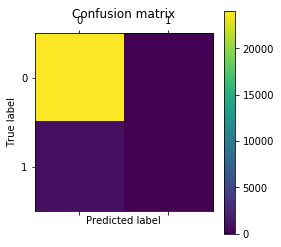

In [30]:
# display confusion matrix
cm = confusion_matrix(target_test, model_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [31]:
#verify DT with Cross Validation, if it variates 10% you are overfitting 
scores = cross_val_score(model, features_train_std, target_train, cv=10)
print("Cross Validation Score for each K",scores)
print('scores mean:{}'.format(np.mean(scores))) 

Cross Validation Score for each K [0.96054181 0.96054181 0.96054181 0.96054181 0.96054181 0.96053407
 0.96053407 0.96053407 0.9607227  0.9607227 ]
scores mean:0.9605756673146487


### 6.1.3 Model, 'max_depth': 1, 'min_samples_leaf': 1, criterion='entropy' , splitter = Random,class_weight: “balanced”  <a class="anchor" id="#Tree3"></a>

In [35]:
model = DecisionTreeClassifier(criterion='entropy',max_depth = 1, min_samples_leaf = 1, max_features = 'auto', random_state=1, splitter = 'random',class_weight = 'balanced' )
print(model)
model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='random')
0.08151632319528042
accuracy: 0.08151632319528042
              precision    recall  f1-score   support

           0       0.99      0.04      0.08     24087
           1       0.04      0.99      0.08      1000

   micro avg       0.08      0.08      0.08     25087
   macro avg       0.52      0.52      0.08     25087
weighted avg       0.96      0.08      0.08     25087



[[ 1052 23035]
 [    7   993]]


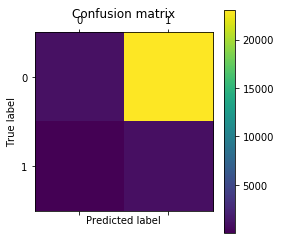

In [36]:
# display confusion matrix
cm = confusion_matrix(target_test, model_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [37]:
#verify DT with Cross Validation, if it variates 10% you are overfitting 
scores = cross_val_score(model, features_train_std, target_train, cv=10)
print("Cross Validation Score for each K",scores)
print('scores mean:{}'.format(np.mean(scores))) 

Cross Validation Score for each K [0.08343149 0.07930899 0.07793483 0.08107578 0.08146839 0.0803063
 0.08285883 0.076183   0.0799293  0.08444619]
scores mean:0.0806943089734356


## 6.1.4 Evaluation & Score of DecisionTree Models <a class="anchor" id="#evaluationDT"></a>

| Model                                                                                                    | Accurancy |Happy(Precision/recall)     |No-Happy(Precision/recal)| CV-Score |
|----------------------------------------------------------------------------------------------------------|-----------|----------------------------|-------------------------|----------|
| 'max_depth': None, 'min_samples_leaf': None                                                              | 0.953     | 0.96/0.99                  | 0.07/0.01               | 0.960    |
| 'max_depth': 1, 'min_samples_leaf': 1, criterion='entropy'                                               | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.960    |
| 'max_depth': 1, 'min_samples_leaf': 1, criterion='entropy' , splitter = Random,class_weight: “balanced”  | 0.081     | 0.99/0.04                  | 0.04/0.99               | 0.08     |

## 6.3 Random Forest <a class="anchor" id="#RandomForest"></a>

### 6.2.1 Baseline Model <a class="anchor" id="#RandomForestBM"></a>

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1)
print(model)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [41]:

model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

0.9600988559811855
accuracy: 0.9600988559811855
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24087
           1       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087



### 6.2.2 Model, n_estimators= 100 <a class="anchor" id="#RandomForest1"></a>

In [42]:
param_grid = {'n_estimators': [50,100,150,200,250]}

In [43]:
knn_gscv = GridSearchCV(model, param_grid, cv=5)

In [44]:
knn_gscv.fit(features_train_std,target_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
knn_gscv.best_params_

{'n_estimators': 100}

In [46]:
knn_gscv.best_score_

0.9582588891288556

In [47]:
model = RandomForestClassifier(n_estimators = 100)
print(model)
model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9601387172639215
accuracy: 0.9601387172639215
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24087
           1       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087



[[24087     0]
 [ 1000     0]]


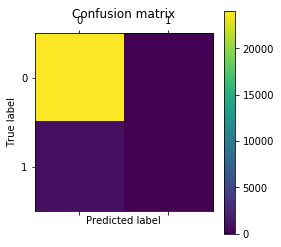

In [48]:
# display confusion matrix
cm = confusion_matrix(target_test, model_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [49]:
#verify DT with Cross Validation, if it variates 10% you are overfitting 
scores = cross_val_score(model, features_train_std, target_train, cv=10)
print("Cross Validation Score for each K",scores)
print('scores mean:{}'.format(np.mean(scores))) 

Cross Validation Score for each K [0.95740086 0.95700824 0.95975658 0.95740086 0.9581861  0.9577852
 0.95798154 0.95935598 0.95836606 0.96013354]
scores mean:0.9583374974859031


### 6.2.3 Model, n_estimators= 100, max_features: 7, oob_score=True<a class="anchor" id="#RandomForest1"></a>

In [50]:
import time
from operator import itemgetter
import os

In [51]:
param_grid = {"max_features": [3, 4, 5, 7, 9]}
start_time = time.clock()

# run grid search
grid_search = GridSearchCV(model, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train_std, target_train)

print("Time to run", time.clock() - start_time, "seconds")


Time to run 90.28712153100014 seconds


In [52]:
grid_search.best_params_

{'max_features': 7}

In [53]:
grid_search.best_score_

0.9583766909469302

In [54]:
model = RandomForestClassifier( n_estimators = 100,max_features= 7,oob_score=True  )
print(model)
model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str (metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
0.9601387172639215
accuracy: 0.9601387172639215
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24087
           1       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087



[[24087     0]
 [ 1000     0]]


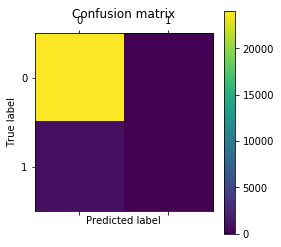

In [55]:
# display confusion matrix
cm = confusion_matrix(target_test, model_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [56]:
#verify DT with Cross Validation, if it variates 10% you are overfitting 
scores = cross_val_score(model, features_train_std, target_train, cv=10)
print("Cross Validation Score for each K",scores)
print('scores mean:{}'.format(np.mean(scores))) 

Cross Validation Score for each K [0.95681194 0.95779348 0.95916765 0.95720455 0.95720455 0.95896328
 0.95798154 0.95994502 0.95895522 0.95915161]
scores mean:0.9583178858169867


### 6.2.4 Model, n_estimators= 100, max_features: 7, oob_score=True, min_samples_leaf': 4, criterion: entropy,  class_weight = balanced <a class="anchor" id="#RandomForest3"></a>

In [57]:
model = RandomForestClassifier( n_estimators = 100,max_features= 7,oob_score=True, min_samples_leaf = 4, criterion= 'entropy', class_weight = 'balanced' )
print(model)
model.fit(
features_train_std, target_train)


# make predictions
model_expected = target_test
model_predicted = model.predict(features_test_std)


print(model.score(features_test_std,target_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(model_expected, model_predicted)))
print(metrics.classification_report(model_expected, model_predicted))

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=7,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True,
            random_state=None, verbose=0, warm_start=False)
0.9601387172639215
accuracy: 0.9601387172639215
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24087
           1       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087



[[24087     0]
 [ 1000     0]]


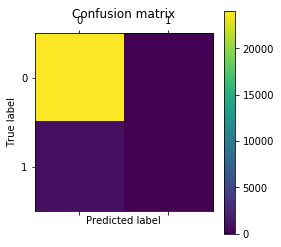

In [58]:
# display confusion matrix
cm = confusion_matrix(target_test, model_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [60]:
#verify DT with Cross Validation, if it variates 10% you are overfitting 
scores = cross_val_score(model, features_train_std, target_train, cv=10)
print("Cross Validation Score for each K",scores)
print('scores mean:{}'.format(np.mean(scores))) 

Cross Validation Score for each K [0.75049077 0.74813506 0.74931292 0.74970554 0.7510797  0.74985274
 0.75358335 0.77105832 0.75589159 0.7572663 ]
scores mean:0.7536376287827553


## 6.2.5 Evaluation & Score of RandomForest Models <a class="anchor" id="#evaluationRF"></a>

| Model                                                                                                                    | Accurancy | Happy(Precision/recall) | N0-happy(Precision/recall) | CV-Score |
|--------------------------------------------------------------------------------------------------------------------------|-----------|----------------------------|-------------------------|----------|
| RF,Baseline Model                                                                                                        | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.958    |
| RF,n_estimators= 100                                                                                                     | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.958    |
| RF,n_estimators= 100, max_features: 7, oob_score=True                                                                    | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.958    |
| RF,n_estimators= 100, max_features: 7, oob_score=True, min_samples_leaf': 4, criterion: entropy, class_weight = balanc'  | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.958    |

## 6.3 Bagging Classifier  <a class="anchor" id="#Bagging"></a>

### 6.3.1 Baseline Model <a class="anchor" id="#BaggingBaseline"></a>

In [19]:
from sklearn.ensemble import BaggingClassifier
Bag_1 = BaggingClassifier( random_state=0)
print(Bag_1)
Bag_1.fit(features_train, target_train)
Bag_1_predicted=Bag_1.predict(features_test)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,Bag_1_predicted))
print(classification_report(expected, Bag_1_predicted,target_names=['No', 'Yes']))
print(confusion_matrix(expected, Bag_1_predicted))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
         verbose=0, warm_start=False)
Bagging Accuracy 0.9560330051421054
              precision    recall  f1-score   support

          No       0.96      0.99      0.98     24087
         Yes       0.21      0.04      0.06      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.59      0.52      0.52     25087
weighted avg       0.93      0.96      0.94     25087

[[23947   140]
 [  963    37]]


### 6.3.2  Bagging, 'n_estimators': 250 <a class="anchor" id="#Bagging1"></a>

In [62]:
param_grid = {"n_estimators": [50,100,150,200,250]}
start_time = time.clock()

# run grid search f
grid_search = GridSearchCV(Bag_1, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train_std, target_train)

print("Time to run", time.clock() - start_time, "seconds")
print(grid_search.best_params_)
print(grid_search.best_score_)

Time to run 2190.308839632 seconds
{'n_estimators': 250}
0.9583766909469302


In [64]:
from sklearn.ensemble import BaggingClassifier
Bag_1 = BaggingClassifier(n_estimators = 250, random_state=0)
print(Bag_1)
Bag_1.fit(features_train_std, target_train)
Bag_1_predicted=Bag_1.predict(features_test_std)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,Bag_1_predicted))
print(classification_report(expected, Bag_1_predicted,target_names=['No', 'Yes']))
print(confusion_matrix(expected, Bag_1_predicted))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=250, n_jobs=None, oob_score=False, random_state=0,
         verbose=0, warm_start=False)
Bagging Accuracy 0.9601387172639215
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.50      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.73      0.50      0.49     25087
weighted avg       0.94      0.96      0.94     25087

[[24085     2]
 [  998     2]]


[[24085     2]
 [  998     2]]


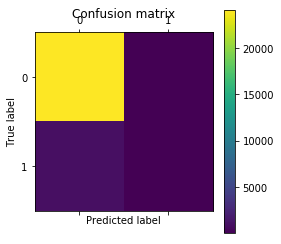

In [ ]:
# display confusion matrix
cm = confusion_matrix(target_test, Bag_1_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [ ]:
# Will use K = 10
BAG1_CV_scores = cross_val_score(Bag_1, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', BAG1_CV_scores)
print('CV mean score: ', BAG1_CV_scores.mean())

### 6.7.3 Bagging, 'n_estimators': 250, 'max_features': 5, 'max_samples': 5<a class="anchor" id="#Bagging3"></a>

In [20]:
param_grid = {"max_samples": np.arange(5, 15),"max_features": np.arange(5, 15) }
start_time = time.clock()

# run grid search 
grid_search = GridSearchCV(Bag_1, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train_std, target_train)

print("Time to run", time.clock() - start_time, "seconds")
print(grid_search.best_params_)
print(grid_search.best_score_)

Time to run 103.34659399000003 seconds
{'max_features': 5, 'max_samples': 5}
0.9605756582176584


In [25]:
from sklearn.ensemble import BaggingClassifier
Bag_1 = BaggingClassifier(n_estimators = 250,max_features=5, max_samples =5, random_state=0)
print(Bag_1)
Bag_1.fit(features_train_std, target_train)
Bag_1_predicted=Bag_1.predict(features_test_std)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,Bag_1_predicted))
print(classification_report(expected, Bag_1_predicted,target_names=['No', 'Yes']))
print(confusion_matrix(expected, Bag_1_predicted))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=5, max_samples=5,
         n_estimators=250, n_jobs=None, oob_score=False, random_state=0,
         verbose=0, warm_start=False)
Bagging Accuracy 0.9601387172639215
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087

[[24087     0]
 [ 1000     0]]


[[24087     0]
 [ 1000     0]]


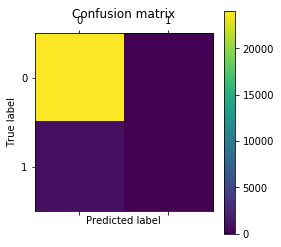

In [26]:
# display confusion matrix
cm = confusion_matrix(target_test, Bag_1_predicted )
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print(cm)

In [27]:
# Will use K = 10
BAG1_CV_scores = cross_val_score(Bag_1, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', BAG1_CV_scores)
print('CV mean score: ', BAG1_CV_scores.mean())

CV Score for each K [0.96054181 0.96054181 0.96054181 0.96054181 0.96054181 0.96053407
 0.96053407 0.96053407 0.9607227  0.9607227 ]
CV mean score:  0.9605756673146487


## 6.2 Evaluation & Score of Bagging Models <a class="anchor" id="#evaluationBagging"></a>

| Model                                                              | Accurancy | No-Churn(Precision/recall) | Churn(Precision/recall) | CV-Score |
|--------------------------------------------------------------------|-----------|----------------------------|-------------------------|----------|
| Bagging, 'n_estimators': 0.956                                     | 0.956     | 0.96/0.99                  | 0.21/0.04               | 0.950    |
| Bagging, 'n_estimators': 250, oob_score=True                       | 0.960     | 0.96/1.00                  | 0.50/0.00               | 0.960    |
| Bagging, 'n_estimators': 250, 'max_features': 5, 'max_samples': 5  | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.960    |

## 6.4 Gradient Boost Classification <a class="anchor" id="#GradientBoost"></a>

### 6.4.1 Baseline Model <a class="anchor" id="#GradientBoost1"></a>

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_1 = GradientBoostingClassifier()
print(GradientBoostingClassifier())
GBC_1.fit(features_train_std, target_train)
GBC_1_predicted = GBC_1.predict(features_test_std)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,GBC_1_predicted))
print(classification_report(expected, GBC_1_predicted,target_names=['No', 'Yes']))
print(confusion_matrix(expected, GBC_1_predicted))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
Gradient Boost Accuracy 0.9591820464782557
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.25      0.01      0.02      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.61      0.51      0.50     25087
weighted avg       0.93      0.96      0.94     25087

[[24051    36]
 [  988    12]]


In [31]:
GBC1_CV_scores = cross_val_score(GBC_1, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', GBC1_CV_scores)
print('CV mean score: ', GBC1_CV_scores.mean())

CV Score for each K [0.95975658 0.95956027 0.95916765 0.95975658 0.9603455  0.95994502
 0.96014137 0.96033772 0.96091909 0.96052632]
CV mean score:  0.9600456088519953


### 6.4.2 Model, Decreasing the Learning Rate: 0.1 & Adding Max Depth : 2 <a class="anchor" id="#GradientBoost2"></a> 

In [35]:
param_grid = {"learning_rate": [.1,.5,1,1.5,2], "max_depth": [2,3,4,5,6]}
start_time = time.clock()

# run grid search 
grid_search = GridSearchCV(GBC_1, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train_std, target_train)

print("Time to run", time.clock() - start_time, "seconds")
print("Best Score", grid_search.best_score_)
print("Best Param", grid_search.best_params_)

Time to run 4780.898407966 seconds
Best Score 0.9602615200361259
Best Param {'learning_rate': 0.1, 'max_depth': 2}


In [37]:
GBC_2 = GradientBoostingClassifier(learning_rate=0.1,max_depth=2)
GBC_2.fit(features_train_std, target_train)
GBC_2_predicted = GBC_2.predict(features_test_std)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,GBC_2_predicted))
print(classification_report(expected, GBC_2_predicted,target_names=['No', 'Yes']))
print(confusion_matrix(expected, GBC_2_predicted))

Gradient Boost Accuracy 0.9599394108502411
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.14      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.55      0.50      0.49     25087
weighted avg       0.93      0.96      0.94     25087

[[24081     6]
 [  999     1]]


In [ ]:
GBC2_CV_scores = cross_val_score(GBC_2, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', GBC2_CV_scores)
print('CV mean score: ', GBC2_CV_scores.mean())

### 6.4.3 Model, Learning Rate: 0.1 & Adding Max Depth: 2 & n_estimators: 50 <a class="anchor" id="#GradientBoost3"></a> 

In [38]:
param_grid = {'n_estimators': [50,100,150,200]}
start_time = time.clock()

# run grid search 
grid_search = GridSearchCV(GBC_2, param_grid=param_grid,n_jobs=-1)

grid_search.fit(features_train_std, target_train)

print("Time to run", time.clock() - start_time, "seconds")
print("Best Score", grid_search.best_score_)
print("Best Param", grid_search.best_params_)

Time to run 538.5622069019992 seconds
Best Score 0.9604971236722754
Best Param {'n_estimators': 50}


In [39]:
GBC_2 = GradientBoostingClassifier(learning_rate=0.1,max_depth=2, warm_start = True, n_estimators = 50 )
GBC_2.fit(features_train_std, target_train)
GBC_2_predicted = GBC_2.predict(features_test_std)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,GBC_2_predicted))
print(classification_report(expected, GBC_2_predicted,target_names=['No', 'Yes']))
print(confusion_matrix(expected, GBC_2_predicted))

Gradient Boost Accuracy 0.9601387172639215
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.00      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087

[[24087     0]
 [ 1000     0]]


In [ ]:
GBC2_CV_scores = cross_val_score(GBC_2, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', GBC2_CV_scores)
print('CV mean score: ', GBC2_CV_scores.mean())

## 6.4.4 Evaluation & Score of Gradient Boost Classification Models <a class="anchor" id="#GradientBoostEvaluation"></a>

| Model                                                                                                       | Accurancy |    Happy(Precision/recall) |No-happy(Precision/recall| CV-Score |
|-------------------------------------------------------------------------------------------------------------|-----------|----------------------------|-------------------------|----------|
| Gradient Boost Classification, Baseline Model                                                               | 0.959     | 0.96/1.00                  | 0.25/0.01               | 0.960    |
| Gradient Boost Classification, Decreasing the Learning Rate: 0.1 & Adding Max Depth : 2                     | 0.959     | 0.96/1.00                  | 0.14/0.00               | 0.959    |
| Gradient Boost Classification, Decreasing the Learning Rate: 0.1 & Adding Max Depth : 2 & n_estimators: 50  | 0.960     | 0.96/1.00                  | 0.00/0.00               | 0.959    |

## 6.5 ANN <a class="anchor" id="#ANN"></a>

### 6.5.1 Baseline <a class="anchor" id="#ANN1"></a>

In [40]:
from sklearn.neural_network import MLPClassifier

# Default parameters 
NN_1 =MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
#fit the model
NN_1.fit(features_train_std, target_train)

# testing 
NN_1_predicted = NN_1.predict(features_test_std)
print("Accuracy", accuracy_score(target_test, NN_1_predicted))
target_names = ["No", "Yes"]
print(classification_report(target_test, NN_1_predicted, target_names=target_names))
print(confusion_matrix(target_test, NN_1_predicted))

Accuracy 0.9590624626300475
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.19      0.01      0.02      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.57      0.50      0.50     25087
weighted avg       0.93      0.96      0.94     25087

[[24052    35]
 [  992     8]]


In [41]:
NN1_CV_scores = cross_val_score(NN_1, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', NN1_CV_scores)
print('CV mean score:', NN1_CV_scores.mean())

CV Score for each K [0.95720455 0.95877503 0.95936396 0.95740086 0.95779348 0.95935598
 0.95582172 0.95817789 0.95915161 0.95974077]
CV mean score: 0.958278585401384


### 6.5.2 Model ANN - Changing hidden layers to 2 with 250 and 150 nodes & power_t=0.6 <a class="anchor" id="#ANN2"></a> 

In [43]:
NN_2 =MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(250,150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.6, random_state=None, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
#fit the model
NN_2.fit(features_train_std, target_train)

# test model
NN_2_predicted = NN_2.predict(features_test_std)
print("Accuracy", accuracy_score(target_test, NN_2_predicted))
target_names = ["No", "Yes"]
print(classification_report(target_test, NN_2_predicted, target_names=target_names))
print(confusion_matrix(target_test, NN_2_predicted))

Accuracy 0.9538007733088851
              precision    recall  f1-score   support

          No       0.96      0.99      0.98     24087
         Yes       0.12      0.03      0.04      1000

   micro avg       0.95      0.95      0.95     25087
   macro avg       0.54      0.51      0.51     25087
weighted avg       0.93      0.95      0.94     25087

[[23902   185]
 [  974    26]]


In [44]:
NN2_CV_scores = cross_val_score(NN_2, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', NN2_CV_scores)
print('CV mean score:', NN2_CV_scores.mean())

CV Score for each K [0.95327837 0.95033373 0.95425991 0.9519042  0.95425991 0.95798154
 0.94914589 0.95150206 0.95384918 0.95404556]
CV mean score: 0.9530560349227549


### 6.5.3 Model ANN - Changing hidden layers to 100 and 100 nodes & power_t=0.9, warm_start=True <a class="anchor" id="#ANN3"></a> 

In [45]:
NN_2 =MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(100,100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.9, random_state=None, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True)
#fit the model
NN_2.fit(features_train_std, target_train)

# test model
NN_2_predicted = NN_2.predict(features_test_std)
print("Accuracy", accuracy_score(target_test, NN_2_predicted))
target_names = ["No", "Yes"]
print(classification_report(target_test, NN_2_predicted, target_names=target_names))
print(confusion_matrix(target_test, NN_2_predicted))

Accuracy 0.95527564077012
              precision    recall  f1-score   support

          No       0.96      0.99      0.98     24087
         Yes       0.11      0.02      0.03      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.53      0.51      0.50     25087
weighted avg       0.93      0.96      0.94     25087

[[23948   139]
 [  983    17]]


In [46]:
NN2_CV_scores = cross_val_score(NN_2, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', NN2_CV_scores)
print('CV mean score:', NN2_CV_scores.mean())

CV Score for each K [0.95563408 0.9540636  0.95347468 0.9519042  0.95504515 0.95385824
 0.95582172 0.95150206 0.95463472 0.95443833]
CV mean score: 0.9540376782121334


## 6.5.4 Evaluation & Score of ANN Models <a class="anchor" id="#ANN4"></a>

| Model                                                                                                                        | Accurancy | Happy(Precision/recall)    | Happy(Precision/recall) | CV-Score |
|------------------------------------------------------------------------------------------------------------------------------|-----------|----------------------------|-------------------------|----------|
| ANN, Baseline                                                                                                                | 0.959     | 0.96/1.00                  | 0.19/0.01               | 0.958    |
| ANN,  Changing hidden layers to 2 with 250 and 150 nodes & power_t=0.6                                                       | 0.953     | 0.96/0.99                  | 0.12/0.03               | 0.953    |
| ANN,  Changing hidden layers to 100 and 100 nodes & power_t=0.9, warm_start=True                                             | 0.955     | 0.95/0.99                  | 0.11/0.02               | 0.955    |

Adding hidden layers the complexibility increments, but the recall for no Happy custumers still remains the same. Therefore, the baseline works better and faster. 

## 6.6.1 Stacking Models <a class="anchor" id="#Stacking"></a>

### 6.6.2 Stack - 1 (Best ANN, Gradient, Tree & Boosting)   <a class="anchor" id="#Stacking1"></a> 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

#Three Models RF, DT, Knn
model_Tree = DecisionTreeClassifier()
model_ANN = NN_2 =MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(250,150), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.6, random_state=None, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
model_Gradient = GBC_1 = GradientBoostingClassifier()
model_Bag= BaggingClassifier( random_state=0)
Stack_1 = VotingClassifier(estimators=[('ANN', model_ANN), ('DecisionTree', model_Tree), 
                                       ('Bagging', model_Bag),('Gradient', model_Gradient)], voting='hard')
for MV, label in zip([model_ANN, model_Tree, model_Bag,model_Gradient, Stack_1], ['ANN', 'DecisionTree', 
                                                'Bagging', 'Gradient', 'Stack_1' ]):

    Stack_scores = cross_val_score(MV, features_train_std, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (Stack_scores.mean(), Stack_scores.std(), label))

Accuracy: 0.95 (+/- 0.00) [ANN]
Accuracy: 0.93 (+/- 0.00) [DecisionTree]
Accuracy: 0.96 (+/- 0.00) [Bagging]
Accuracy: 0.96 (+/- 0.00) [Gradient]
Accuracy: 0.96 (+/- 0.00) [Stack_1]


In [50]:
#fit the model
Stack_1.fit(features_train_std, target_train)

# test model
NN_2_predicted = Stack_1.predict(features_test_std)
print("Accuracy", accuracy_score(target_test, NN_2_predicted))
target_names = ["No", "Yes"]
print(classification_report(target_test, NN_2_predicted, target_names=target_names))
print(confusion_matrix(target_test, NN_2_predicted))

Accuracy 0.9601387172639215
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     24087
         Yes       0.50      0.00      0.00      1000

   micro avg       0.96      0.96      0.96     25087
   macro avg       0.73      0.50      0.49     25087
weighted avg       0.94      0.96      0.94     25087

[[24086     1]
 [  999     1]]


In [51]:
NN2_CV_scores = cross_val_score(Stack_1, features_train_std, target_train, cv=10,scoring='accuracy')
print('CV Score for each K', NN2_CV_scores)
print('CV mean score:', NN2_CV_scores.mean())

CV Score for each K [0.9603455  0.96054181 0.9601492  0.96073812 0.96073812 0.96014137
 0.95994502 0.96033772 0.96052632 0.9607227 ]
CV mean score: 0.9604185889703114


## 7. Conclusion & Findings <a class="anchor" id="#conclusiion"></a>

### 7.1 Bussines Problem: 

#### 7.1.2 Develop an understanding of the project 

Customer churn also is known as the loss of clients or customers. The companies use customer churn rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies, as Santander, often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.Therefore, detecting clients unhappy with the company is crucial to identify possible churn clients. 
Acquiring new customers is essential, but retaining them accelerates profitable growth. 

#### 7.1.3 Data Science problem solving

Therefore, Santander Bank is asking Data scientist to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late. I have been tasked to provide information that may help in achieving two priorities. They are trying to 1) understanding unhappy customers ("Why are they unhappy? Who are they ?"), and 2)predict the probability of a dissatisfied customer. With this, Santander bank can learn which solution to take for the best possible outcome and be prescribed logical, best-case scenario actions to take to improve performance. Also, finding their target audience. 

### 7.2 Demonstrable outcomes: 

 The data was unstructured and very complicated to analyze, so prior to the EDA (exploratory Data Analysis) I've applied the following methods: 
 
 +  Feature Selection: we've performed the ExtraTreesClassifier,f_classif and chi2 test. The last two found 12 the number of most influence features regarding my target variable. However, I will combine the outcome of the three difentet analyses to make sure that these variables can explain more than 95 % variance of the target variable (Happy or Un-Happy Customers). Reducing future complexity of the models. 
 + Succesfully handling missing values applying Knn algorithm to the train data. Reducing the risk of having bias in our predictive models.  
 + In order to make the data readable I succesfuly range the data by age, salary, balance account and so on. 
 

**Please let's review carefully the following plots as result of the EDA.**
 
 

In [43]:
#function for pie plot for customer churn types

def plot_pie(column) :
    
    trace1 = go.Pie(values  = Happy[column].value_counts().values.tolist(),
                    labels  = Happy[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Happy Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = No_Happy[column].value_counts().values.tolist(),
                    labels  = No_Happy[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "No Happy customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Happy customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Happy customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
    #for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)


#### Findings: 

1. Non happy customers have a lower mortage than the happy clients. 

2. 88% porcent of the non happy customers group are Adults or Seniors. On the other hand, only the 54 % of the Happy customer are Seniors or Adults. This is explained by the fact that the bank is doing a great job with the young adults group (age: 15-15 years). 

3. Non happy customer are most likely to have a negative or low balance in their account. Indeed, 70 % porcent of the non-happy customers have a negative balance.

More EDA... 

#### Important information : On the following plots attached below the label 1 represents Happy customers and label 0 Non-Happy customer

In [44]:
py.iplot(fig2)
py.iplot(fig1)
py.iplot(fig3)
py.iplot(fig5)
py.iplot(fig4)
py.iplot(fig6)

Grouping the variables into categorical and associate them with the mean values confirmed my initial insights: 

+ In every age group, happy clients average higher mortgage value. 

+ In every mortgage group, the age of non happy clients average seven years older. 

+ Big gap between non happy and happy clients regarding the balance variable. Happy clients clearly deposit more money in the bank.

So, the bank is doing a good job having the young adult group happy. However, my analysis shows that the bank should focus more with the old and senior age group. Why ? they have the highest balance accounts and if they decide to switch bank it would be a significant lost for the bank. Indeed, the majority of unhappy clients are seniors and adults (25-45 years old). 

#### Conclusions after EDA

Regarding the task of understanding unhappy customers, I've found several significant recommendations that can help the bank's decision-making in future marketings campaigns or reducing risk. 
 
1. Review low-mortgage’s conditions. It seems to make unhappy to a significant number of clients. 

2. Non-happy old and seniors clients’ balance is growing significantly. They average the most significant balance accounts and value(mortgage), so it would be a great idea to target them with the objective to switch them to the Happy client's group. 


### Machine Learning Outcomes

Identifying which customers are likely to leave the bank, in advance can help companies take measures in order to reduce customer churn. Therefore, we've developed and tested six different algorithms with great results.  

After test tons of different algorithms, We've decided that the best approach for this data set would be the so-called "meta-algorithms". Approaches to combine several machine learning techniques into one predictive model in order to decrease the variance (bagging), bias (boosting) or improving the predictive force (stacking alias ensemble). Below, you can find the table with the summary of results: 

| Model                                                                                                                                 | Accurancy | CV-Score |
|---------------------------------------------------------------------------------------------------------------------------------------|-----------|----------|
| Decision Tree, model = DecisionTreeClassifier()                                                                                       | 0.953     | 0.960    | 
| Random Forest, n_estimators= 100, max_features: 7, oob_score=True, min_samples_leaf': 4, criterion: entropy,  class_weight = balanced | 0.960     | 0.958    | 
|   Bagging,  random_state=0                                                                                                            | 0.956     | 0.954    |
| Gradient Boost Classification, GradientBoostingClassifier()                                                                           | 0.959     | 0.960    |
| **Stack - 1 (Best ANN, Gradient, Tree & Boosting)**                                                                                       | 0.960     | 0.960    | 



We've chosen the Stack algorithm as the champion model because it produces the best Cross Validation result and it is computationally expensive as the Random Forest. Why stack model ? Ensemble learning helps improve machine learning results by combining several models. This algorithm allows the production of better predictive performance compared to a single model. This models combines the predicitive performance of ANN model (Artificial neuronal network), Gradient Boost and boosting algorithm. To get the best parameters combination for each model, we've developed a sklearn pipeline with a custom hyperparameter search optimization. This pipeline allows the algorithm to learn from future re-trains helping the model to get even better results over time. 

In conclusion, using data science in the banking industry is more than a trend, it has become a necessity to keep up with the competition. Banks using big data technologies can help them focus their resources efficiently, make smarter decisions, and improve performance.